## Importing library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
loan_data = pd.read_csv('loan_sanction_train.csv')

In [3]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


**About dataset**
* **Gender**, Applicant gender (Male/Female)
* **Married**, Applicant marital status (Yes/No)
* **Dependents**, Number of applicant dependents
* **Education**, Applicant bachelors degree education (Graduate/Not Graduate)
* **Self_Employed**, Applicant employment (Yes/No)
* **Applicant_Income**, Applicant income
* **Coapplicant_Income**, Co-applicant income
* **Loan_Amount**, Applicant loan amount
* **Term**, Term of the loan in months
* **redit_History**, Credit history meets guidelines (1=Good/0=Bad)
* **Area**, Urban/Semiurban/Rural
* **Status**, Loan approval status (Y=Approved/N=Not Approved)

## Preprocessing

### Eliminating null data

In [4]:
loan_data.isnull().sum()

Loan_ID                0
Gender                13
Married                3
Dependents            15
Education              0
Self_Employed         32
Applicant_Income       0
Coapplicant_Income     0
Loan_Amount           22
Term                  14
Credit_History        50
Area                   0
Status                 0
dtype: int64

so, as you can see. we have null data in several columns. i'm gonna eliminate all null data

In [5]:
loan_data.dropna(inplace=True)

In [6]:
loan_data.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
Applicant_Income      0
Coapplicant_Income    0
Loan_Amount           0
Term                  0
Credit_History        0
Area                  0
Status                0
dtype: int64

now, all the null data has been erased

### Check duplicate

In [7]:
duplicate_data = loan_data[loan_data.duplicated()]

In [8]:
duplicate_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status


there is no duplicate row in our data. so, we don't have to drop anything

### Changing the currency from Indian Rupee to Indonesian Dollar Rupiah

In [9]:
exchange_rate_loan = 188000
exchange_rate = 188

i'm assuming exchange rate from rupee to rupiah is 188

In [10]:
loan_data['Applicant_Income(IDR)'] = loan_data['Applicant_Income'] * exchange_rate
loan_data['Coapplicant_Income(IDR)'] = loan_data['Coapplicant_Income'] * exchange_rate
loan_data['Loan_Amount(IDR)'] = loan_data['Loan_Amount'] * exchange_rate_loan

In [11]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Term,Credit_History,Area,Status,Applicant_Income(IDR),Coapplicant_Income(IDR),Loan_Amount(IDR)
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,861604,283504.0,24064000.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,564000,0.0,12408000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,485604,443304.0,22560000.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1128000,0.0,26508000.0
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,1018396,788848.0,50196000.0


since we already convert it into IDR, we can drop Rupee's columns

In [12]:
loan_data = loan_data.drop(['Applicant_Income', 'Coapplicant_Income','Loan_Amount'], axis=1)

In [13]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Status,Applicant_Income(IDR),Coapplicant_Income(IDR),Loan_Amount(IDR)
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,861604,283504.0,24064000.0
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,564000,0.0,12408000.0
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,485604,443304.0,22560000.0
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,1128000,0.0,26508000.0
5,LP001011,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,Y,1018396,788848.0,50196000.0


## Exploratory Data Analysis

### Univariate Analysis

#### Numerical variables distribution

For numerical variables (Applicant Income, Co-applicant Income, Loan Amount), analyze their distributions using histograms, box plots, and summary statistics (mean, median, standard deviation)

In [14]:
numerical_vars = ['Applicant_Income(IDR)', 'Coapplicant_Income(IDR)', 'Loan_Amount(IDR)']

       Applicant_Income(IDR)  Coapplicant_Income(IDR)  Loan_Amount(IDR)
count           4.800000e+02             4.800000e+02      4.800000e+02
mean            1.008475e+06             2.972456e+05      2.721026e+07
std             1.065631e+06             4.921261e+05      1.513553e+07
min             2.820000e+04             0.000000e+00      1.692000e+06
25%             5.449650e+05             0.000000e+00      1.880000e+07
50%             7.254920e+05             2.038860e+05      2.406400e+07
75%             1.100270e+06             4.236110e+05      3.196000e+07
max             1.522800e+07             6.361356e+06      1.128000e+08


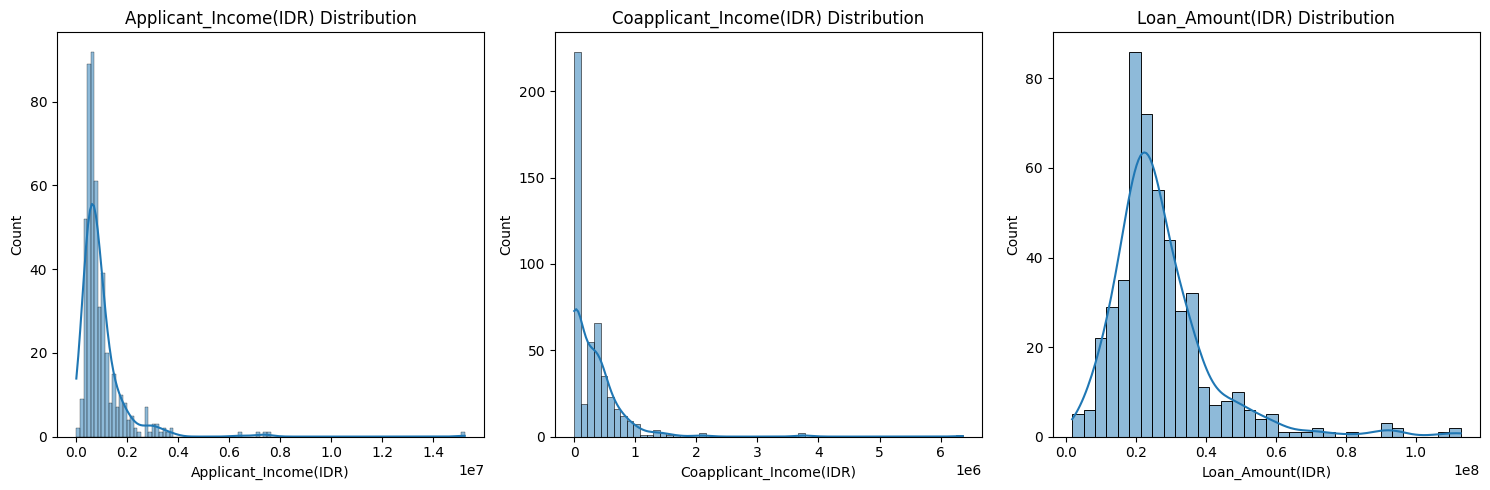

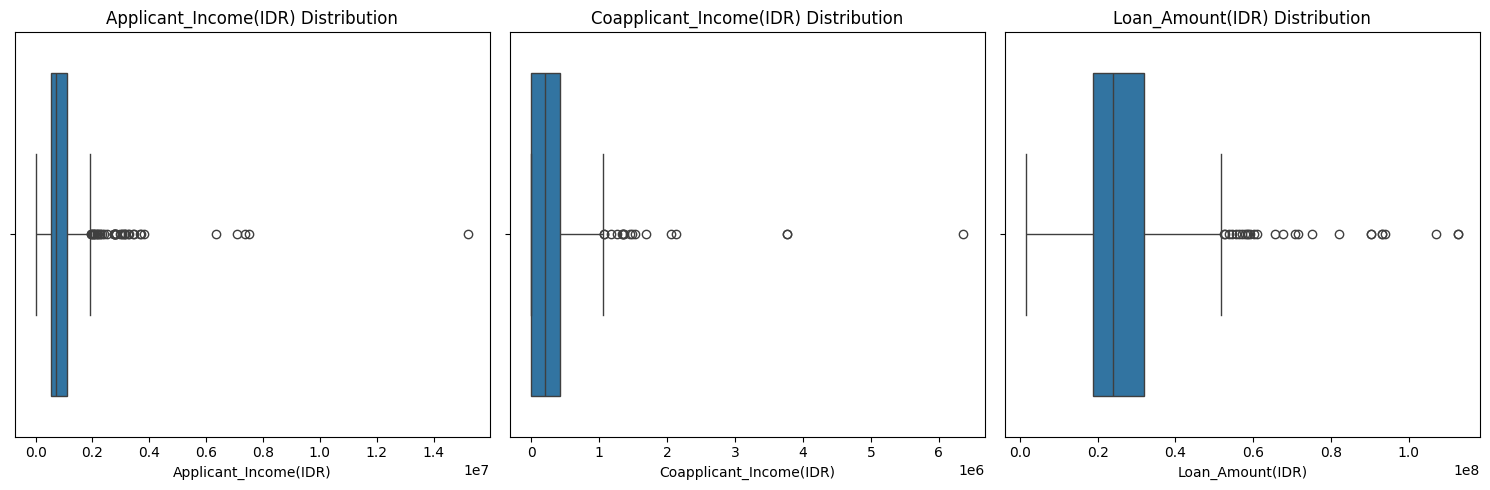

In [15]:
#histogram
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=loan_data, x=var, kde=True)
    plt.title(f'{var} Distribution')

plt.tight_layout()

#boxplot
plt.figure(figsize=(15, 5))
for i, var in enumerate(numerical_vars, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(data=loan_data, x=var)
    plt.title(f'{var} Distribution')

plt.tight_layout()

summary_stats = loan_data[numerical_vars].describe()
print(summary_stats)

#### Categorical variables distribution

For categorical variables (Gender, Marital Status, Dependents, Education, Employment, Term, Credit History, Area, Approval Status), create frequency tables, bar plots, or pie charts to understand the distribution of each category.

In [16]:
categorical_vars = ['Gender', 'Married', 'Dependents', 'Education', 
                    'Self_Employed', 'Term', 'Credit_History', 'Area', 'Status']


Frequency Table for Gender:
   Gender  Percentage
0    Male    0.820833
1  Female    0.179167

Frequency Table for Married:
  Married  Percentage
0     Yes    0.647917
1      No    0.352083

Frequency Table for Dependents:
  Dependents  Percentage
0          0    0.570833
1          2    0.177083
2          1    0.166667
3         3+    0.085417

Frequency Table for Education:
      Education  Percentage
0      Graduate    0.797917
1  Not Graduate    0.202083

Frequency Table for Self_Employed:
  Self_Employed  Percentage
0            No      0.8625
1           Yes      0.1375

Frequency Table for Term:
    Term  Percentage
0  360.0    0.856250
1  180.0    0.075000
2  480.0    0.025000
3  300.0    0.018750
4  120.0    0.006250
5   84.0    0.006250
6   60.0    0.004167
7  240.0    0.004167
8   36.0    0.004167

Frequency Table for Credit_History:
   Credit_History  Percentage
0             1.0    0.854167
1             0.0    0.145833

Frequency Table for Area:
        Area  Percentage

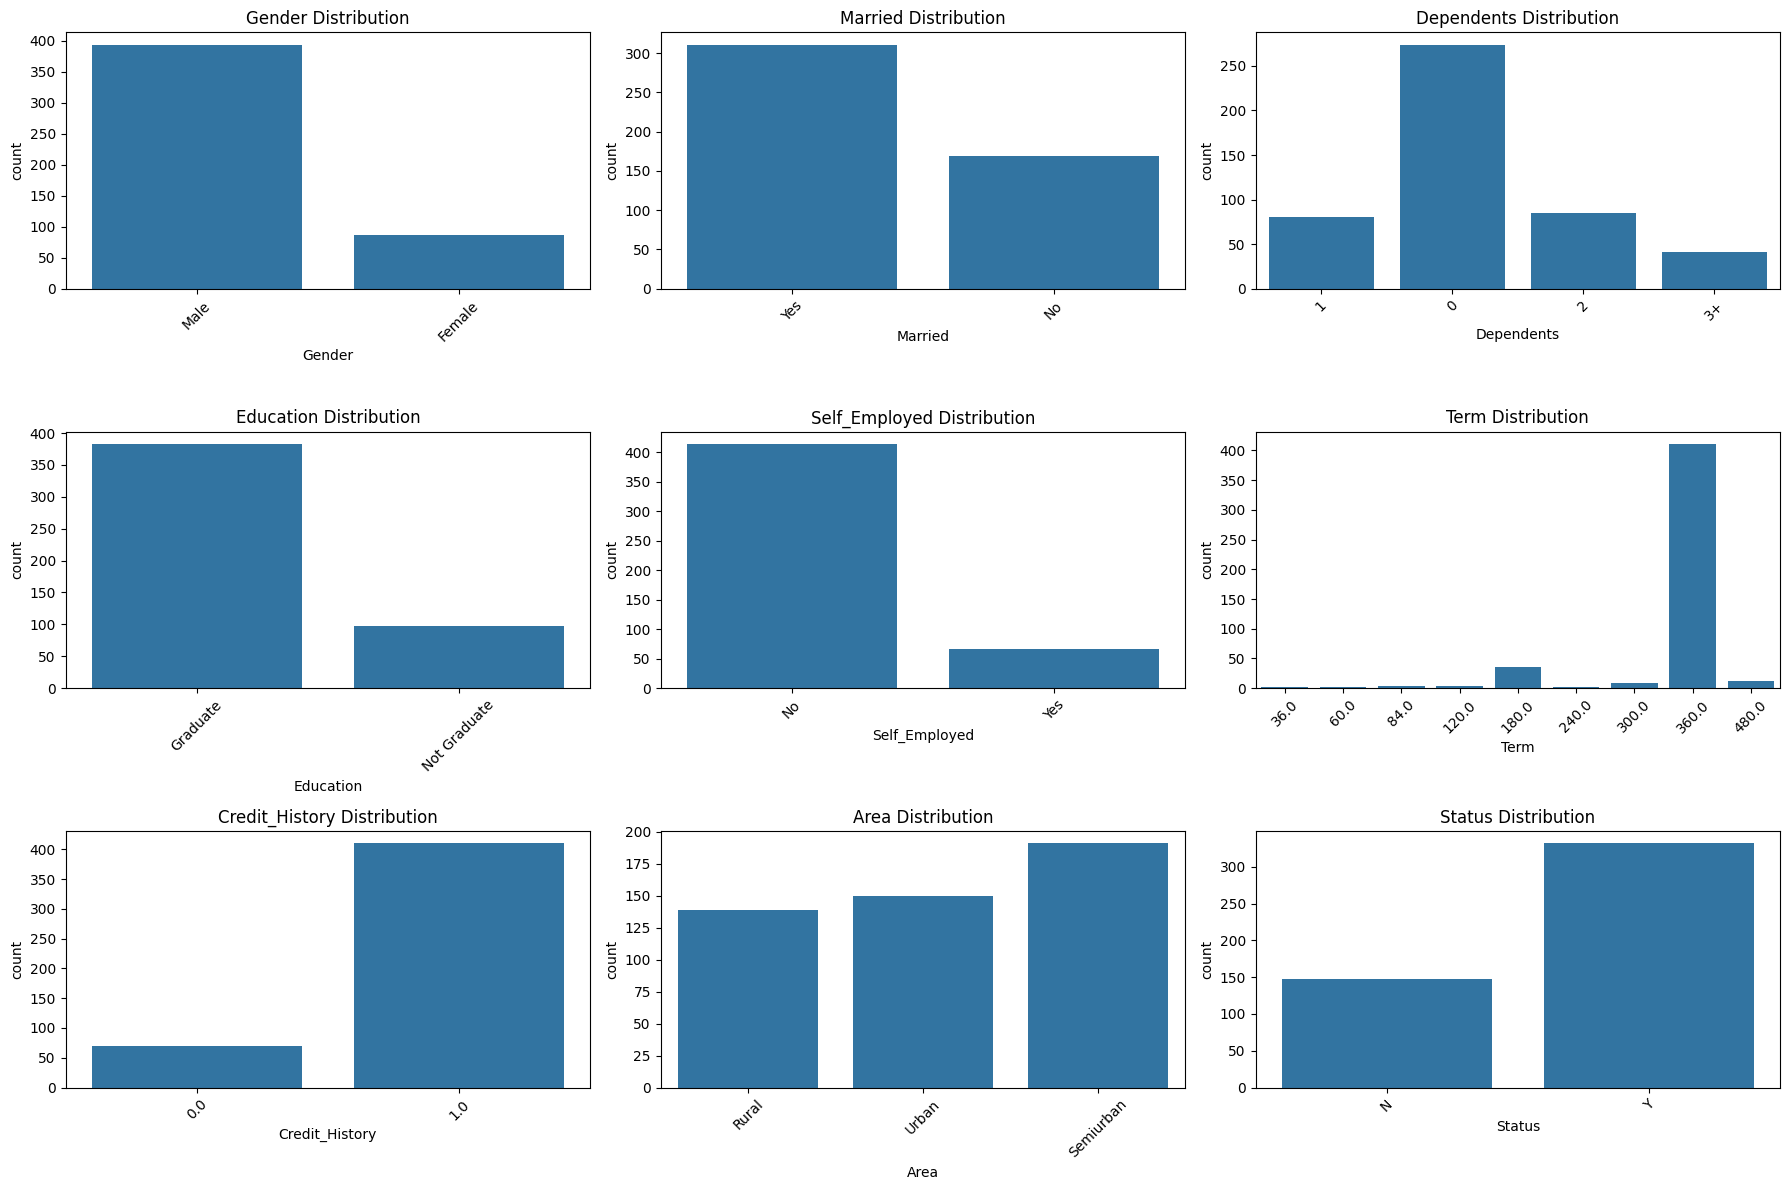

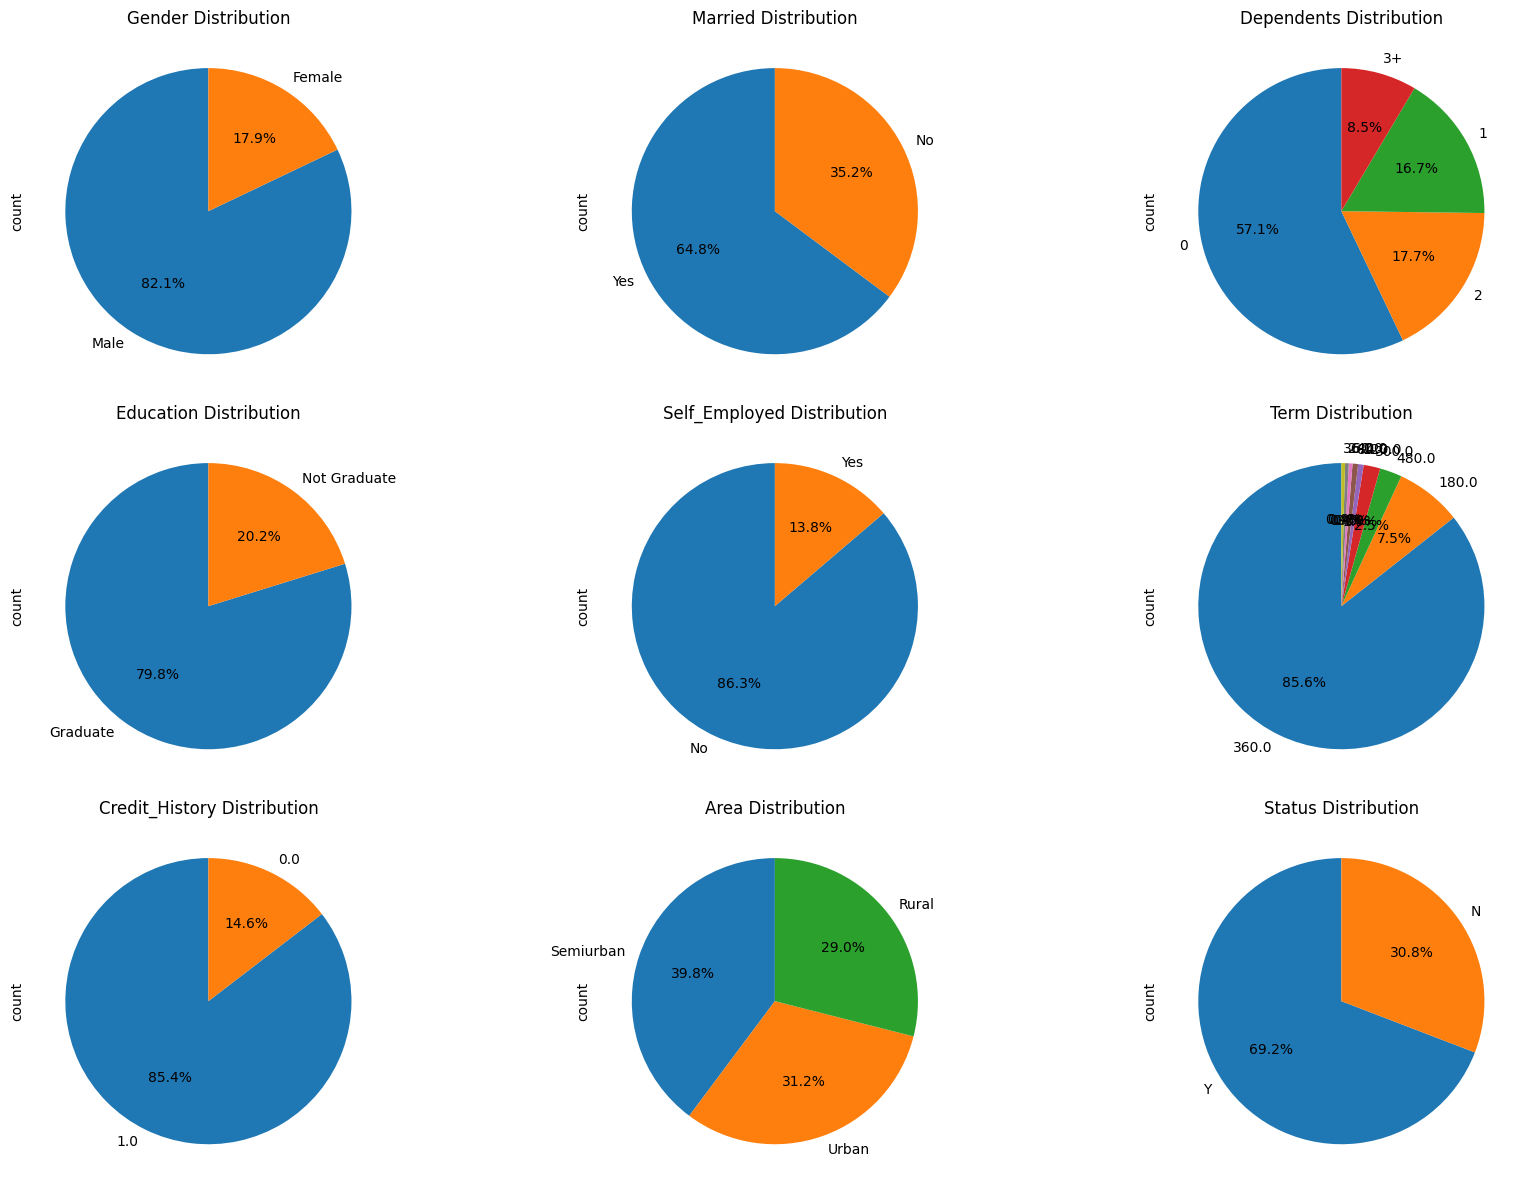

In [17]:
for var in categorical_vars:
    freq_table = loan_data[var].value_counts(normalize=True).reset_index()
    freq_table.columns = [var, 'Percentage']
    print(f"\nFrequency Table for {var}:\n{freq_table}")

#barplot
plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=loan_data, x=var)
    plt.title(f'{var} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()

#piechart
plt.figure(figsize=(18, 12))
for i, var in enumerate(categorical_vars, 1):
    plt.subplot(3, 3, i)
    loan_data[var].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(f'{var} Distribution')

plt.tight_layout()

### Bivariate Analysis

#### Variables comparison

Compare the distribution of Applicant Income and Co-applicant Income by Gender, Marital Status, Education, etc., using box plots

In [18]:
comparison_vars = ['Gender', 'Married', 'Education']

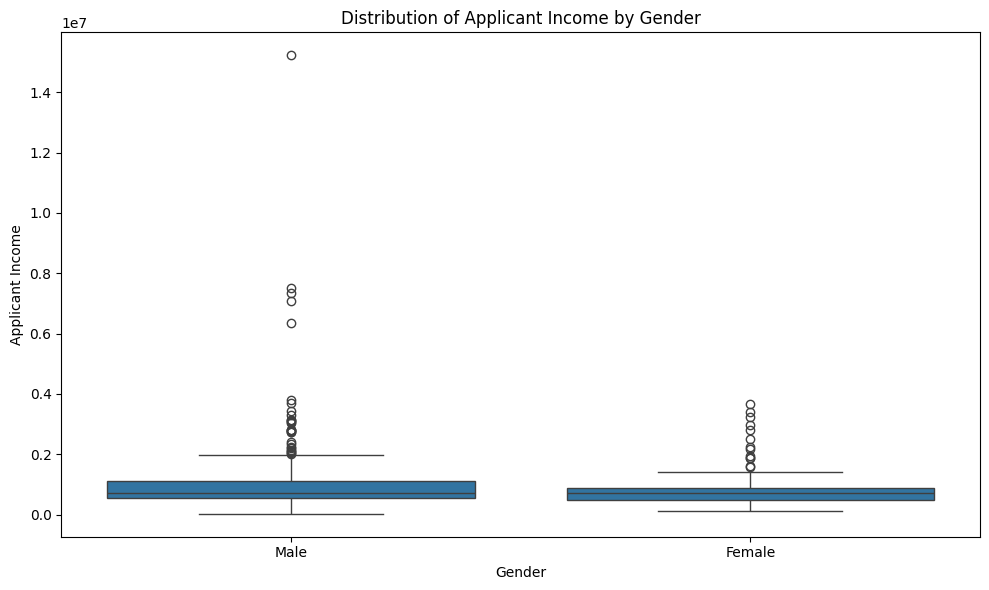

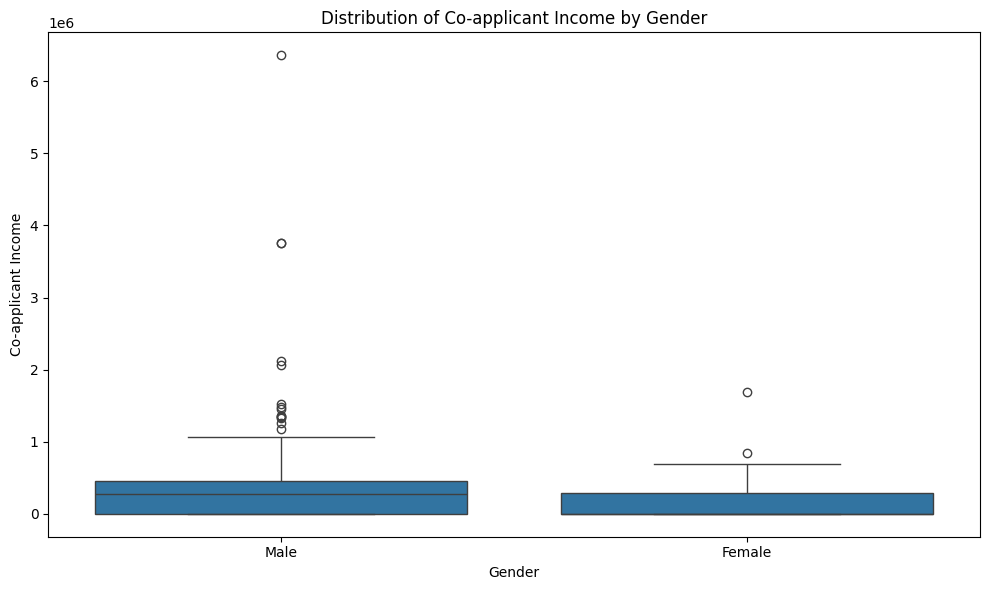

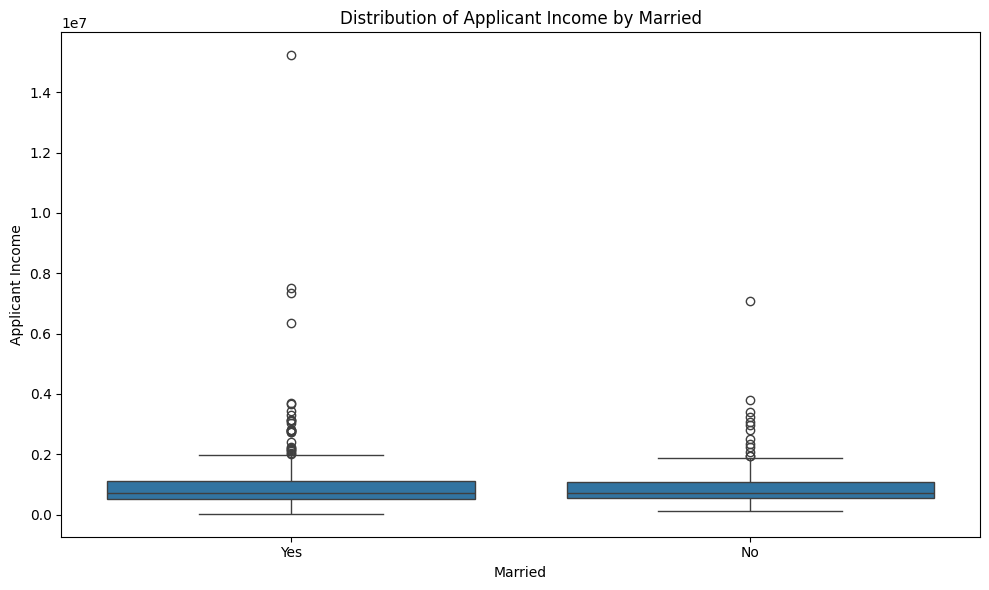

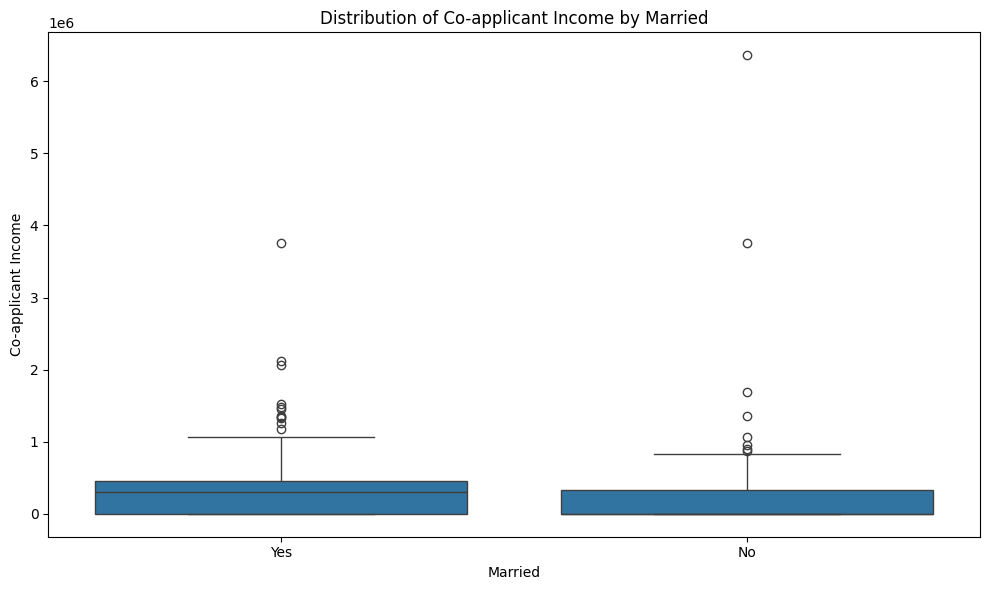

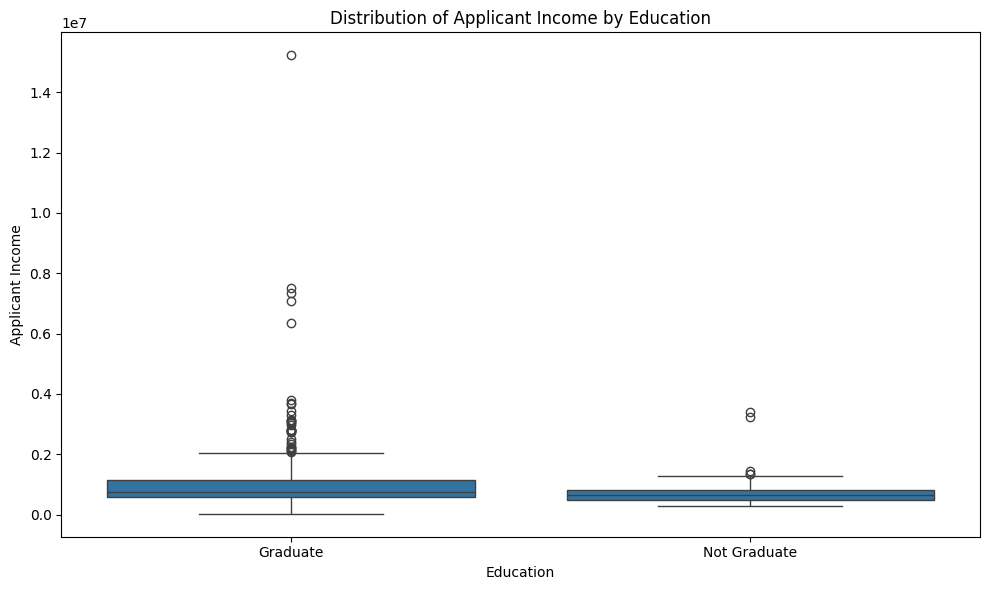

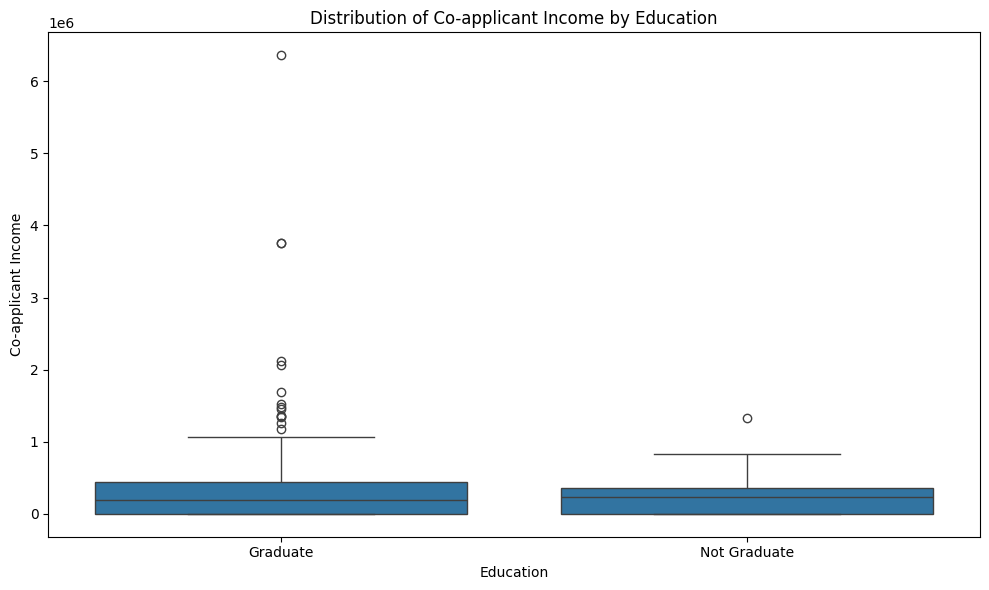

In [19]:
for var in comparison_vars:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=loan_data, x=var, y='Applicant_Income(IDR)')
    plt.title(f'Distribution of Applicant Income by {var}')
    plt.ylabel('Applicant Income')
    plt.xlabel(var)
    plt.tight_layout()

    plt.figure(figsize=(10, 6))
    sns.boxplot(data=loan_data, x=var, y='Coapplicant_Income(IDR)')
    plt.title(f'Distribution of Co-applicant Income by {var}')
    plt.ylabel('Co-applicant Income')
    plt.xlabel(var)
    plt.tight_layout()

#### Relationship between Loan Amount and Applicant Income

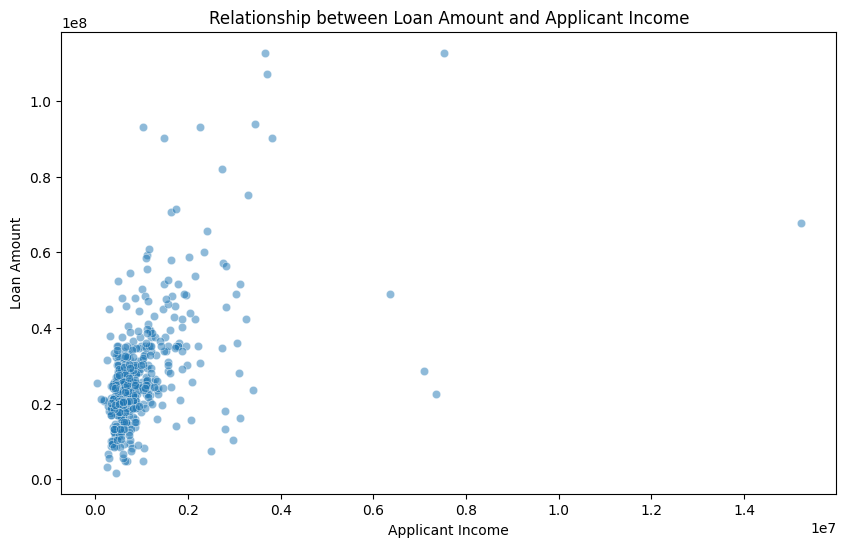

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=loan_data, x='Applicant_Income(IDR)', y='Loan_Amount(IDR)', alpha=0.5)
plt.title('Relationship between Loan Amount and Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

#### Approval status proportion for each categorical

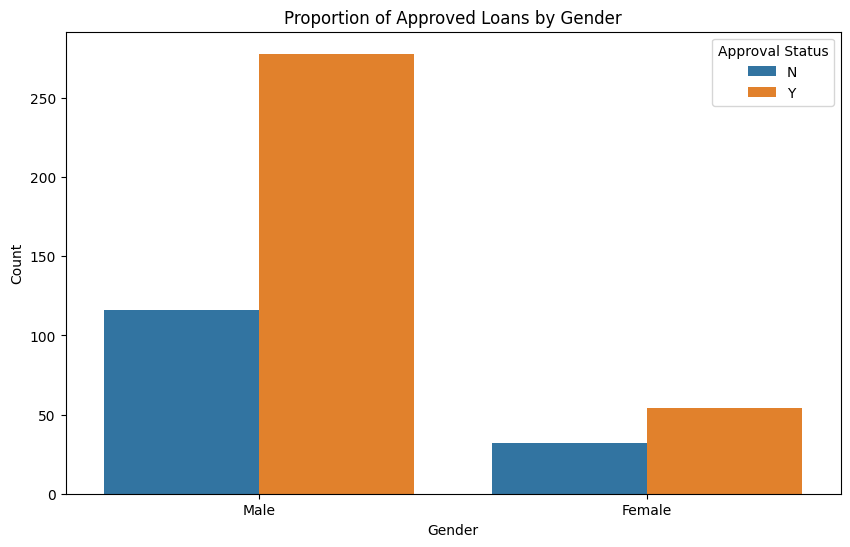

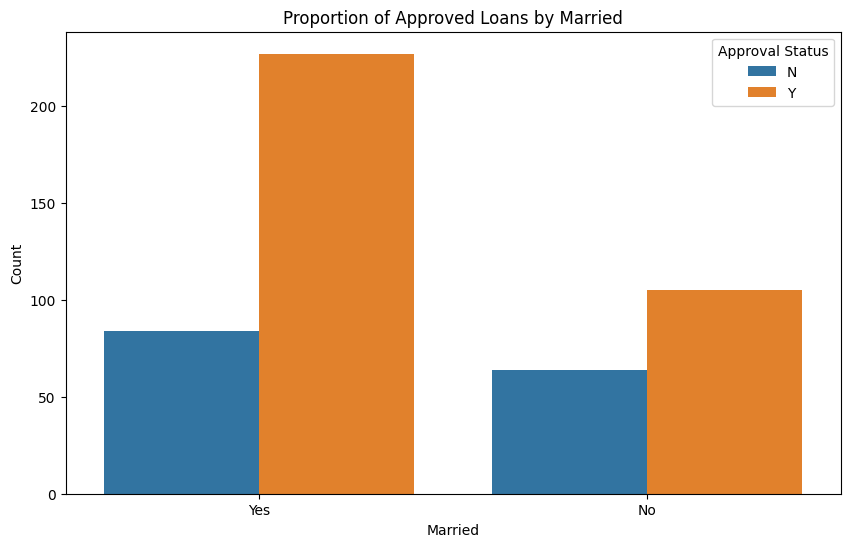

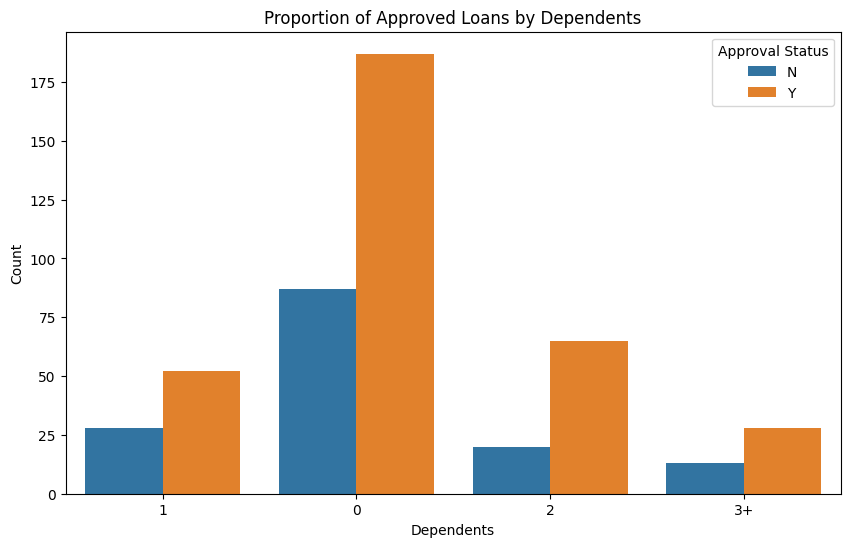

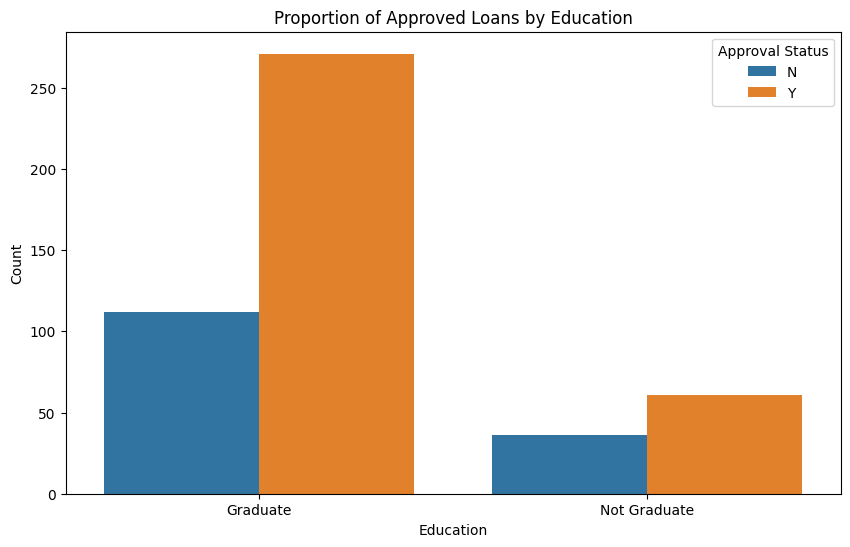

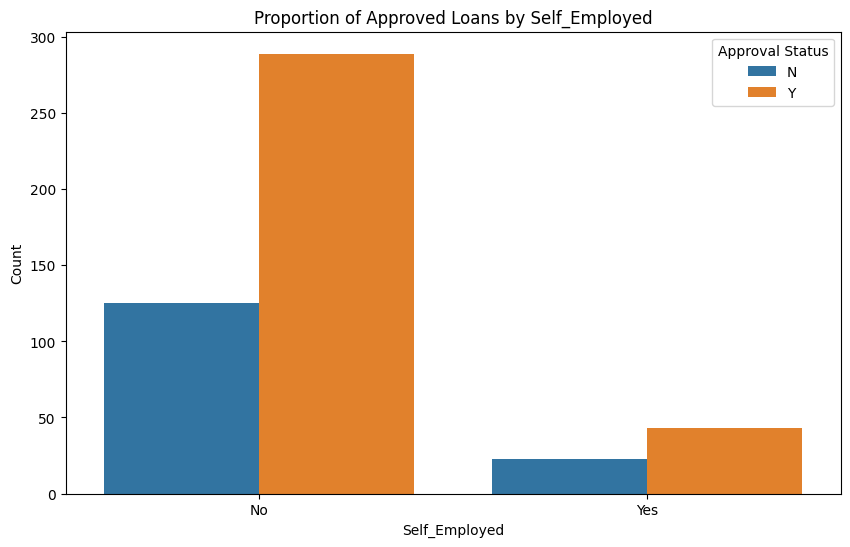

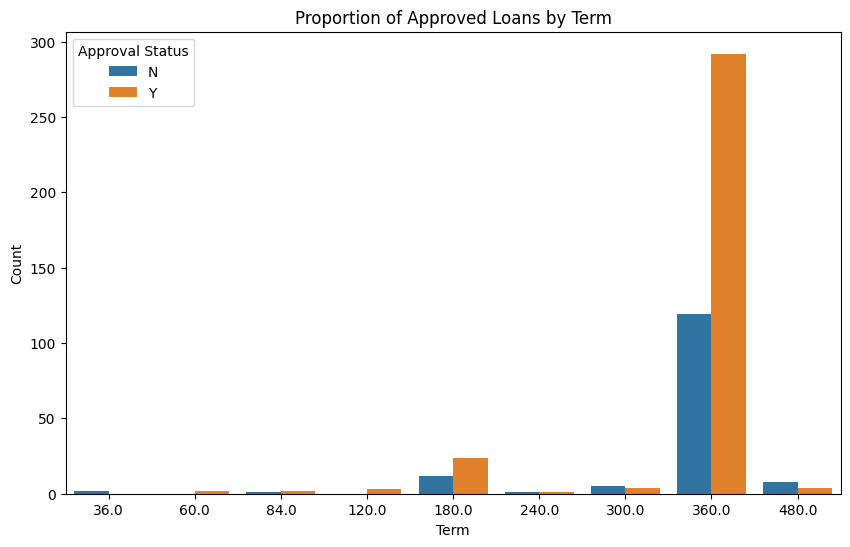

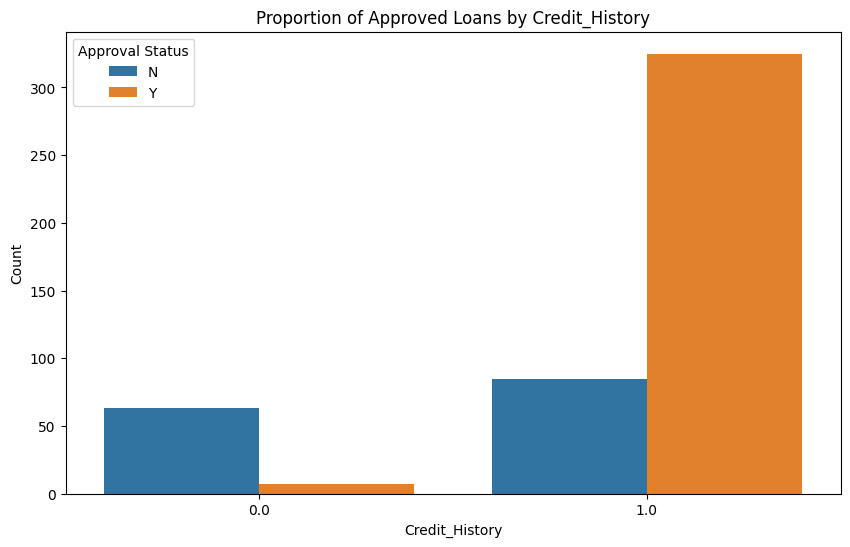

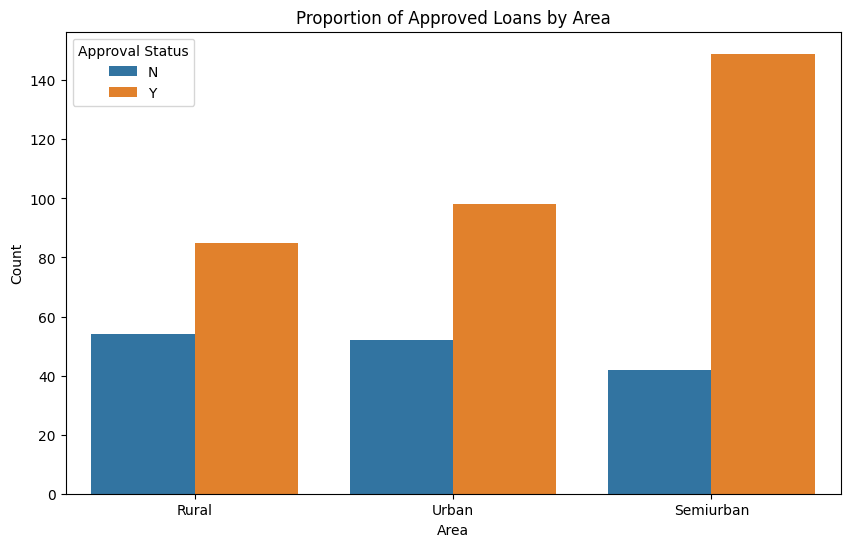

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


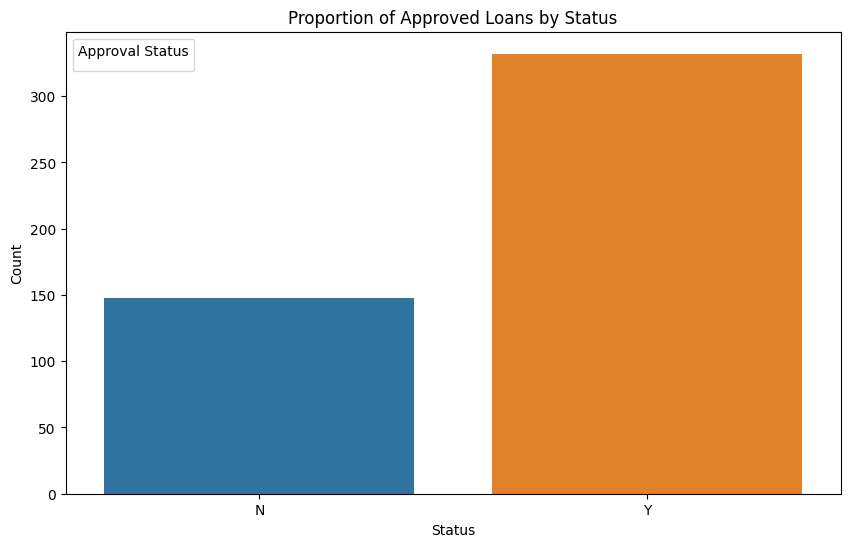

In [21]:
#barplot
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=loan_data, x=var, hue='Status')
    plt.title(f'Proportion of Approved Loans by {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.legend(title='Approval Status')
    plt.show()

#### Impact of Credit History on loan approval

Analyze the impact of Credit History on loan approval by comparing approval rates for different levels of Credit History.

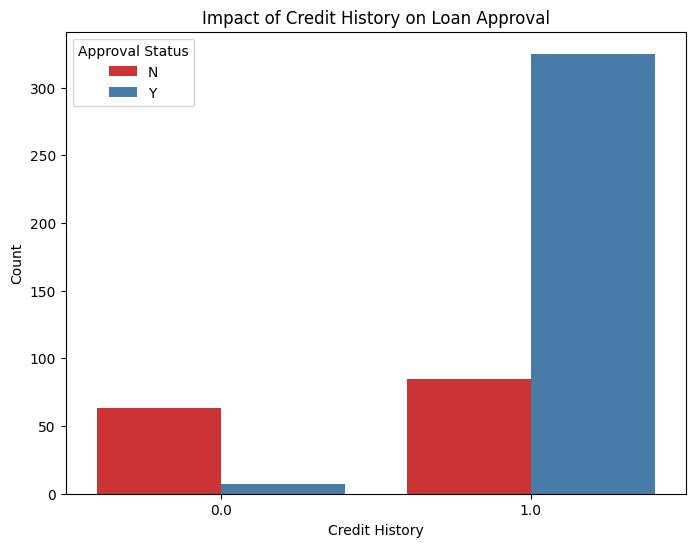

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=loan_data, x='Credit_History', hue='Status', palette='Set1')
plt.title('Impact of Credit History on Loan Approval')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Approval Status')
plt.show()

as we can see, good credit history has a impact for the loan approval

### Multivariate Analysis

#### Correlations between numerical variables

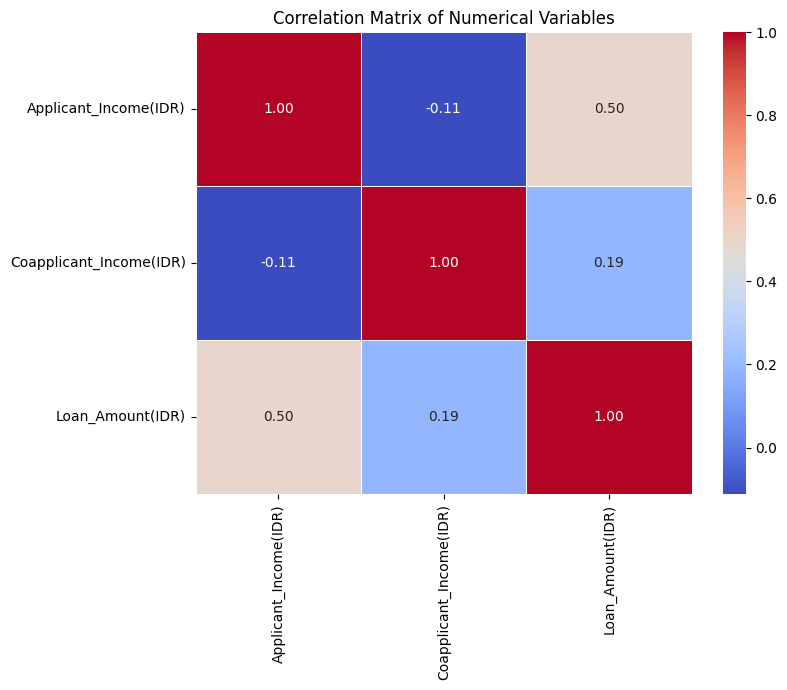

In [23]:
#corr matrix
corr_matrix = loan_data[numerical_vars].corr()

#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

from the heatmap, we see our data do not really has strong correlation from each other

#### Interactions between categorical variables

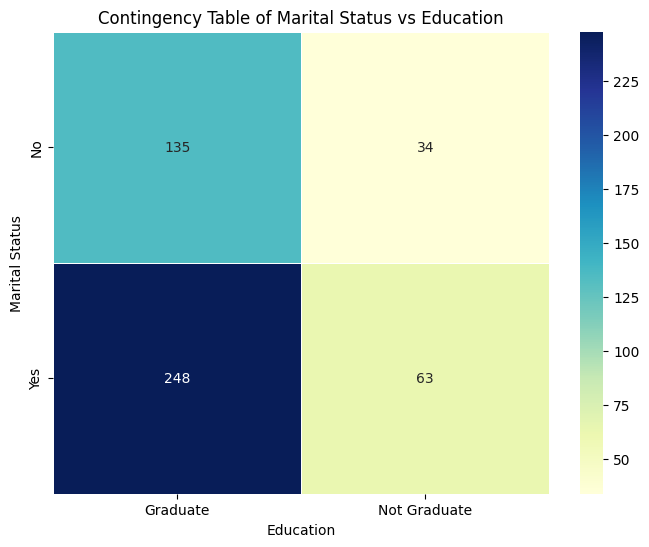

In [24]:
#contigency table
contingency_table = pd.crosstab(index=loan_data['Married'], columns=loan_data['Education'])

#heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu', fmt="d", linewidths=0.5)
plt.title('Contingency Table of Marital Status vs Education')
plt.xlabel('Education')
plt.ylabel('Marital Status')
plt.show()

married with bachelor degree dominated our data

### Features Engineering

#### Debt-to-Income ratio

In [25]:
loan_data['Total Income'] = loan_data['Applicant_Income(IDR)'] + loan_data['Coapplicant_Income(IDR)']
loan_data['Loan per Month'] = loan_data['Loan_Amount(IDR)']/ loan_data['Term']
loan_data['Debt-to-Income Ratio'] = loan_data['Loan per Month'] / loan_data['Total Income']

In [26]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Status,Applicant_Income(IDR),Coapplicant_Income(IDR),Loan_Amount(IDR),Total Income,Loan per Month,Debt-to-Income Ratio
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,861604,283504.0,24064000.0,1145108.0,66844.444444,0.058374
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,564000,0.0,12408000.0,564000.0,34466.666667,0.061111
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,485604,443304.0,22560000.0,928908.0,62666.666667,0.067463
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,1128000,0.0,26508000.0,1128000.0,73633.333333,0.065278
5,LP001011,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,Y,1018396,788848.0,50196000.0,1807244.0,139433.333333,0.077152


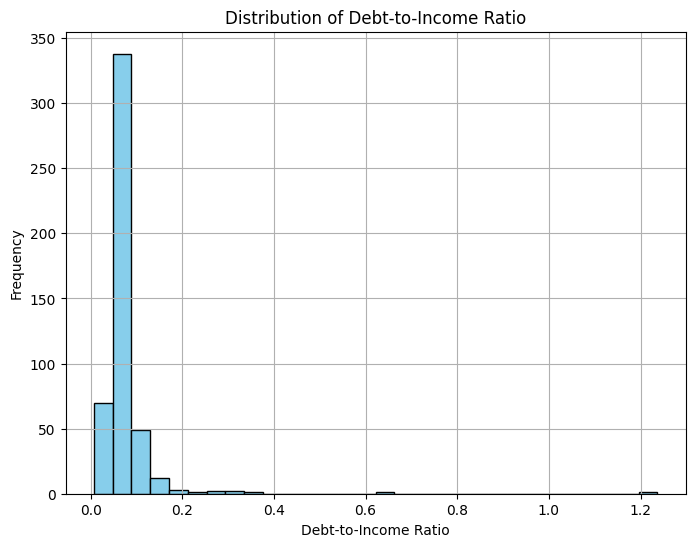

In [27]:
plt.figure(figsize=(8, 6))
plt.hist(loan_data['Debt-to-Income Ratio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Debt-to-Income Ratio')
plt.xlabel('Debt-to-Income Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

C:\Users\EDENFARM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 29.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\EDENFARM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 15.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\EDENFARM\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3370: UserWarning: 51.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


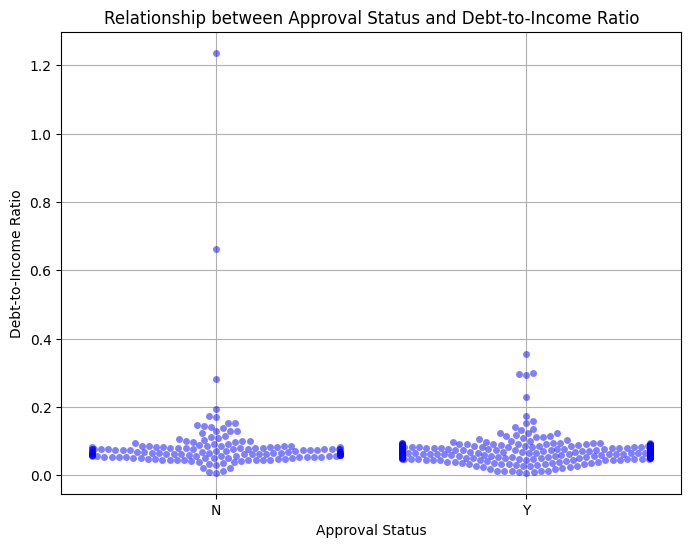

In [28]:
#swarmplot
plt.figure(figsize=(8, 6))
sns.swarmplot(data=loan_data, x='Status', y='Debt-to-Income Ratio', color='blue', alpha=0.5)
plt.title('Relationship between Approval Status and Debt-to-Income Ratio')
plt.xlabel('Approval Status')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(True)
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
loan_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Status,Applicant_Income(IDR),Coapplicant_Income(IDR),Loan_Amount(IDR),Total Income,Loan per Month,Debt-to-Income Ratio
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,861604,283504.0,24064000.0,1145108.0,66844.444444,0.058374
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,564000,0.0,12408000.0,564000.0,34466.666667,0.061111
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,485604,443304.0,22560000.0,928908.0,62666.666667,0.067463
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,1128000,0.0,26508000.0,1128000.0,73633.333333,0.065278
5,LP001011,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,Y,1018396,788848.0,50196000.0,1807244.0,139433.333333,0.077152


In [31]:
model_data = loan_data.drop(['Loan_ID','Total Income', 'Loan per Month', 'Debt-to-Income Ratio'], axis = 1)

In [32]:
model_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Status,Applicant_Income(IDR),Coapplicant_Income(IDR),Loan_Amount(IDR)
1,Male,Yes,1,Graduate,No,360.0,1.0,Rural,N,861604,283504.0,24064000.0
2,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,Y,564000,0.0,12408000.0
3,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,Y,485604,443304.0,22560000.0
4,Male,No,0,Graduate,No,360.0,1.0,Urban,Y,1128000,0.0,26508000.0
5,Male,Yes,2,Graduate,Yes,360.0,1.0,Urban,Y,1018396,788848.0,50196000.0


In [33]:
model_data['Gender'].replace({'Male':1,'Female':0},inplace=True)
model_data['Married'].replace({'Yes':1,'No':0},inplace=True)
model_data['Dependents'].replace({'0':0,'1':1,'2':2,'3+':3},inplace=True)
model_data['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
model_data['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
model_data['Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
model_data['Status'].replace({'Y':1,'N':0},inplace=True)

In [34]:
model_data.head()

,Gender,Married,Dependents,Education,Self_Employed,Term,Credit_History,Area,Status,Applicant_Income(IDR),Coapplicant_Income(IDR),Loan_Amount(IDR)
1,1,1,1,1,0,360.0,1.0,0,0,861604,283504.0,24064000.0
2,1,1,0,1,1,360.0,1.0,2,1,564000,0.0,12408000.0
3,1,1,0,0,0,360.0,1.0,2,1,485604,443304.0,22560000.0
4,1,0,0,1,0,360.0,1.0,2,1,1128000,0.0,26508000.0
5,1,1,2,1,1,360.0,1.0,2,1,1018396,788848.0,50196000.0


In [35]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   480 non-null    int64  
 1   Married                  480 non-null    int64  
 2   Dependents               480 non-null    int64  
 3   Education                480 non-null    int64  
 4   Self_Employed            480 non-null    int64  
 5   Term                     480 non-null    float64
 6   Credit_History           480 non-null    float64
 7   Area                     480 non-null    int64  
 8   Status                   480 non-null    int64  
 9   Applicant_Income(IDR)    480 non-null    int64  
 10  Coapplicant_Income(IDR)  480 non-null    float64
 11  Loan_Amount(IDR)         480 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 48.8 KB


In [36]:
X = model_data.drop(columns=['Status'])
y = model_data['Status']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

In [38]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8229166666666666

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.39      0.56        28
           1       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



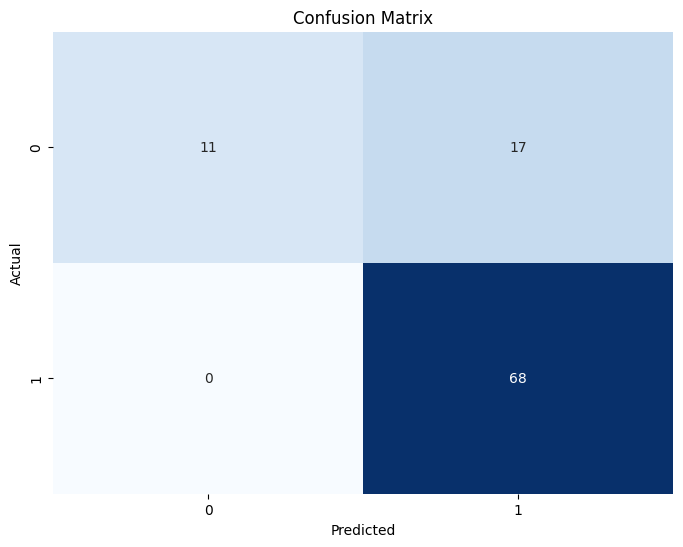

In [39]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [40]:
import pickle

In [41]:
pickle.dump(svm_classifier,open('model.pkl','wb'))
model = pickle.load(open('model.pkl','rb'))
pickle.dump(scaler,open('scaler.pkl','wb'))
model = pickle.load(open('scaler.pkl','rb'))